In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import seed
# import tensorflow as tf
import sklearn
from sklearn import preprocessing
from sklearn import model_selection
# from keras.models import Sequential
# from keras.layers.core import Dense, Dropout, Activation,Flatten
# from keras.layers.embeddings import Embedding
# from keras import regularizers
# from keras import| optimizers
# from keras import backend
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import time
import math
from sklearn import cluster,datasets,metrics
from sklearn.decomposition import PCA
import sys
import time
import numpy.fft as fft

In [7]:
train_df = pd.read_csv("data1/train.csv")

In [26]:
train_log_df = pd.read_csv("data1/train_log.csv",nrows =500)

In [8]:
tl = train_log_df.dropna()

In [24]:
Dp = ['DATE','MASK_ID','SUBSTRATE_ID','SHUTTER','SRC3_SHUTTER_STATUS','EVAPORATION_HALT']

In [84]:
P1.iloc[:196,:]

,P_ID,NUMBER_OF_PROCESSING,DEGREE_OF_VACUUM_IG,DEGREE_OF_VACUUM_PG,PLC_THICKNESS_SP,PLC_THICKNESS_PV,PLC_SRC3_SHUTTER_OPEN_THICKNESS_SP,PLC_SRC3_SHUTTER_CLOSE_THICKNESS_SP,RAW_RATE_1,AVERAGE_RATE_1,...,INIT_PREHEAT_TIME_3,PREHEAT_START_TIME_3,CELL_CHANGE_TIME_3,CELL_CHANGE_CTRL_DLY_TIME_3,XXXX_USE_TIME_3,XXXX_COUNT_3,PLC_THICKNESS_3,MASK_CHANGE_COUNT_SP,MASK_CHANGE_COUNT_PV,champer
67,924,50,0.000055,0.018,1370.0,0.0,0.0,0.0,2.0,2.0,...,180,0,0,0,11196,3,0.000000,0,8,2
68,924,50,0.000049,0.018,1370.0,0.0,0.0,0.0,2.0,2.0,...,180,0,0,0,11196,3,0.000000,0,8,2
69,924,50,0.000037,0.018,1370.0,0.0,0.0,0.0,2.0,2.0,...,180,0,0,0,11196,3,0.000000,0,8,2
70,924,50,0.000030,0.018,1370.0,0.0,0.0,0.0,2.0,2.0,...,180,0,0,0,11196,3,0.000000,0,8,2
71,924,50,0.000030,0.018,1370.0,23.0,0.0,0.0,2.0,2.0,...,180,0,0,0,11196,3,2.608696,0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,924,9,0.000022,0.038,200.0,200.0,0.0,0.0,1.0,1.0,...,120,0,120,0,0,0,0.000000,0,8,6
141,924,9,0.000022,0.038,200.0,200.0,0.0,0.0,1.0,1.0,...,120,0,120,0,0,0,0.000000,0,8,6
142,924,9,0.000022,0.039,200.0,200.0,0.0,0.0,1.0,1.0,...,120,0,120,0,0,0,0.000000,0,8,6
143,924,9,0.000031,0.038,200.0,200.0,0.0,0.0,2.0,1.0,...,120,0,120,0,0,0,0.000000,0,8,6


In [28]:
train_log_df = train_log_df.drop(Dp,axis=1)

In [85]:
P1 = train_log_df[train_log_df['P_ID']==924].sort_values('TIME')

In [86]:
P2 = train_log_df[train_log_df['P_ID']==1341].sort_values('TIME')

In [69]:
P1.iloc[:,1]

67     924
68     924
69     924
70     924
71     924
      ... 
140    924
141    924
142    924
143    924
144    924
Name: P_ID, Length: 196, dtype: int64

In [89]:
P1

,P_ID,TIME,NUMBER_OF_PROCESSING,DEGREE_OF_VACUUM_IG,DEGREE_OF_VACUUM_PG,PLC_THICKNESS_SP,PLC_THICKNESS_PV,PLC_SRC3_SHUTTER_OPEN_THICKNESS_SP,PLC_SRC3_SHUTTER_CLOSE_THICKNESS_SP,RAW_RATE_1,...,INIT_PREHEAT_TIME_3,PREHEAT_START_TIME_3,CELL_CHANGE_TIME_3,CELL_CHANGE_CTRL_DLY_TIME_3,XXXX_USE_TIME_3,XXXX_COUNT_3,PLC_THICKNESS_3,MASK_CHANGE_COUNT_SP,MASK_CHANGE_COUNT_PV,champer
67,924,21:03:12,50,0.000055,0.018,1370.0,0.0,0.0,0.0,2.0,...,180,0,0,0,11196,3,0.000000,0,8,2
68,924,21:03:22,50,0.000049,0.018,1370.0,0.0,0.0,0.0,2.0,...,180,0,0,0,11196,3,0.000000,0,8,2
69,924,21:03:32,50,0.000037,0.018,1370.0,0.0,0.0,0.0,2.0,...,180,0,0,0,11196,3,0.000000,0,8,2
70,924,21:03:42,50,0.000030,0.018,1370.0,0.0,0.0,0.0,2.0,...,180,0,0,0,11196,3,0.000000,0,8,2
71,924,21:03:52,50,0.000030,0.018,1370.0,23.0,0.0,0.0,2.0,...,180,0,0,0,11196,3,2.608696,0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,924,21:38:22,9,0.000022,0.038,200.0,200.0,0.0,0.0,1.0,...,120,0,120,0,0,0,0.000000,0,8,6
141,924,21:38:32,9,0.000022,0.038,200.0,200.0,0.0,0.0,1.0,...,120,0,120,0,0,0,0.000000,0,8,6
142,924,21:38:42,9,0.000022,0.039,200.0,200.0,0.0,0.0,1.0,...,120,0,120,0,0,0,0.000000,0,8,6
143,924,21:38:52,9,0.000031,0.038,200.0,200.0,0.0,0.0,2.0,...,120,0,120,0,0,0,0.000000,0,8,6


In [88]:
A = pd.Panel.from_dict(LOG, intersect=False, orient='items', dtype=None)

<ipython-input-88-87b136f173f7>:1: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  A = pd.Panel.from_dict(LOG, intersect=False, orient='items', dtype=None)


AttributeError: type object 'Panel' has no attribute 'from_dict'

In [70]:
complex_array = fft.fft(P1.iloc[:,1])

In [72]:
complex_array.shape

(196,)

In [42]:
P2 = train_log_df[train_log_df['P_ID']==1341].sort_values('TIME')

In [2]:
def PlotScatter(var,t):
    data = pd.concat((train_df[TargetIndex[t]], train_df[var]),axis=1)  
    f, ax = plt.subplots(figsize=(16, 8))
    fig = plt.scatter(x=var, y=TargetIndex[t], data=data)
def PlotBox(var,t):
    data = pd.concat((train_df[TargetIndex[t]], train_df[var]),axis=1)  
#     f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y=TargetIndex[t], data=data,whis=1)
#     fig.axis(ymin=0, ymax=0.01)
def History(hist):
    plt.plot(hist.history["mae"])
    plt.plot(hist.history["val_mae"])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

In [2]:
TargetIndex = ["CIEX","CIEY","CIEX_DIFF","CIEY_DIFF"]
Dp = ['id','5-1_value','5-2_value','5-3_value']
Label_Index = ['PLC_THICKNESS_SP','XXXX_USE_TIME_2','PLC_THICKNESS_2','THICKNESS_3','STATE_3','XXXX_RATE_3','XXXX_POWER_3','MASK_CHANGE_COUNT_PV']
Label_Index_PID = ['P_ID','PLC_THICKNESS_SP','XXXX_USE_TIME_2','PLC_THICKNESS_2','THICKNESS_3','STATE_3','XXXX_RATE_3','XXXX_POWER_3','MASK_CHANGE_COUNT_PV']
Columns = ["id","5-1_value","5-2_value","5-3_value","2-1_M","2-3_M","3-1_M","5-1_M","5-3_M","TYPE"]
Delete = ['DATE','TIME','MASK_ID','SHUTTER','SRC3_SHUTTER_STATUS','EVAPORATION_HALT']
Label_Index_Cluster=['PLC_THICKNESS_2','STATE_3','STATE_3_y','XXXX_POWER_3_y']

In [3]:
train_df = pd.read_csv("data1/train.csv")
train_df.drop_duplicates(subset = ['P_ID'],inplace=True)
train_log_df = pd.read_csv("data1/train_log.csv")
test_df = pd.read_csv("data1/test.csv")
test_log_df = pd.read_csv("data1/test_log.csv")
all_df = pd.concat([train_df,test_df])
all_log_df = pd.concat([train_log_df,test_log_df])
all_log_df = all_log_df.interpolate()
Data_df = all_df[Columns]

C:\Users\USER\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
Cookie_df = all_log_df[all_log_df['P_ID']==all_df['P_ID'].iloc[0]][Label_Index_PID]
kmeans_fit = cluster.KMeans(n_clusters = 2).fit(Cookie_df[Label_Index].values)
Cookie_df.insert(Cookie_df.shape[1],'cluster',kmeans_fit.labels_)
Log_cluster_df = pd.DataFrame(Cookie_df[Cookie_df['cluster']==0].mean())
for i in range(len(all_df['P_ID'])):
    Cookie_df = all_log_df[all_log_df['P_ID']==all_df['P_ID'].iloc[i]][Label_Index_PID]
    kmeans_fit = cluster.KMeans(n_clusters = 2).fit(Cookie_df[Label_Index].values)
    Cookie_df.insert(Cookie_df.shape[1],'cluster',kmeans_fit.labels_)
    if(i==0):
        for k in range(1,2,1):
            Log_cluster_df.insert(Log_cluster_df.shape[1],k,Cookie_df[Cookie_df['cluster']==k].mean())
    else:
        for k in range(2):
            Log_cluster_df.insert(Log_cluster_df.shape[1],i*2+k,Cookie_df[Cookie_df['cluster']==k].mean())
#     print('\r',str(i/len(all_df['P_ID'])*100).ljust(10),end='', flush=True)
    sys.stdout.write("\r Now Loading : %d / %d" %(i/len(all_df['P_ID'])*100+1, 100))
    sys.stdout.flush()
Log_cluster_df = Log_cluster_df.T

 Now Loading : 100 / 100

In [5]:
a = Log_cluster_df[Log_cluster_df['cluster']==0].drop(['cluster'],axis=1)
a.index = range(len(a))
b = Log_cluster_df[Log_cluster_df['cluster']==1].drop(['cluster','P_ID'],axis=1)
b.index = range(len(b))
c = pd.concat([a,b] ,axis=1)
c.columns = ['P_ID','PLC_THICKNESS_SP','XXXX_USE_TIME_2','PLC_THICKNESS_2','THICKNESS_3','STATE_3','XXXX_RATE_3','XXXX_POWER_3','MASK_CHANGE_COUNT_PV','PLC_THICKNESS_SP_y','XXXX_USE_TIME_2_y','PLC_THICKNESS_2_y','THICKNESS_3_y','STATE_3_y','XXXX_RATE_3_y','XXXX_POWER_3_y','MASK_CHANGE_COUNT_PV_y']

In [6]:
OneHotData_df = pd.get_dummies(Data_df)
OneHotData_df = OneHotData_df.interpolate()

In [7]:
Std = ["5-1_value","5-2_value","5-3_value"]
OneHotData_df[Std] = preprocessing.scale(OneHotData_df[Std])
Log_label = pd.DataFrame(preprocessing.scale(c[Label_Index_Cluster]))
Log_label.columns = Label_Index_Cluster
for i in range(Log_label.shape[1]):
    OneHotData_df.insert(OneHotData_df.shape[1],Label_Index_Cluster[i],Log_label[Label_Index_Cluster[i]])

In [75]:
train = OneHotData_df[:4953]
sub_label = OneHotData_df[4953:]
train_label, test_label, train_feature, test_feature =  model_selection.train_test_split( train,all_df[TargetIndex][:4953], test_size=0.33, random_state=42)

In [76]:
W = [0.249,0.330,0.172,0.204]

In [123]:
import keras.backend as K


def my_mean_absolute_error(y_true, y_pred):
    print(y_pred*W)
    return K.sum((K.abs(y_pred - y_true)*W), axis=-1)

In [ ]:
Results3 = []
Results4 = []
for u in range(100):
    backend.clear_session()
    seed(3)
    #main neul network
    model = Sequential()
    #set layer
    model.add(Dense(100, kernel_initializer="uniform", input_dim=39,activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(units=18,activation='relu'))
    model.add(Dense(units=18,activation='relu'))
    model.add(Dense(units=18,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=4,activation='relu'))
    #model.summary()
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
    model.compile(loss=my_mean_absolute_error, optimizer='adam', metrics=["mae"])
#     model.compile(loss='mean_absolute_error', optimizer='adam', metrics=["mae"])

    hist = model.fit(train_label.drop(['id'],axis=1), train_feature, batch_size=96,epochs=10000 , verbose=0,validation_split=0,callbacks=[callback],shuffle = False)

    test_1_Pre =  model.predict(test_label.drop(['id'],axis=1))
    Pre_df = pd.DataFrame(test_1_Pre)

    W = [0.249,0.330,0.172,0.204]
    Wmae = 0
    for n in range(2):
        MAE = 0
        for i in range(len(Pre_df[0])):
            MAE = MAE + abs(Pre_df[n][i]-test_feature[TargetIndex[n]].iloc[i])
        Wmae = Wmae + (MAE/len(Pre_df[n]))*W[n]
    print(Wmae)
    Results3.append(Wmae)
    Wmae = 0
    for n in range(4):
        MAE = 0
        for i in range(len(Pre_df[0])):
            MAE = MAE + abs(Pre_df[n][i]-test_feature[TargetIndex[n]].iloc[i])
        Wmae = Wmae + (MAE/len(Pre_df[n]))*W[n]
    print(Wmae)
    sys.stdout.write("\r Now Loading : %d / %d" %((u/100)*100+1, 100))
    sys.stdout.flush()
    Results4.append(Wmae)

Tensor("loss/dense_5_loss/my_mean_absolute_error/mul:0", shape=(None, 4), dtype=float32)
0.034447836066647634
0.03665857710640299
 Now Loading : 1 / 100Tensor("loss/dense_5_loss/my_mean_absolute_error/mul:0", shape=(None, 4), dtype=float32)
0.08042539454713862
0.08263613558689398
 Now Loading : 2 / 100Tensor("loss/dense_5_loss/my_mean_absolute_error/mul:0", shape=(None, 4), dtype=float32)
0.030758855196150212
0.03296959623590556
 Now Loading : 3 / 100Tensor("loss/dense_5_loss/my_mean_absolute_error/mul:0", shape=(None, 4), dtype=float32)
0.025201110007504905
0.027411851047260256
 Now Loading : 4 / 100Tensor("loss/dense_5_loss/my_mean_absolute_error/mul:0", shape=(None, 4), dtype=float32)
0.029874614631619705
0.032085355671375056
 Now Loading : 5 / 100Tensor("loss/dense_5_loss/my_mean_absolute_error/mul:0", shape=(None, 4), dtype=float32)
0.030958813197801804
0.03316955423755716
 Now Loading : 6 / 100Tensor("loss/dense_5_loss/my_mean_absolute_error/mul:0", shape=(None, 4), dtype=float32

In [ ]:
Results1 = []
Results2 = []
for u in range(100):
    backend.clear_session()
    seed(3)
    #main neul network
    model = Sequential()
    #set layer
    model.add(Dense(100, kernel_initializer="uniform", input_dim=39,activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(units=18,activation='relu'))
    model.add(Dense(units=18,activation='relu'))
    model.add(Dense(units=18,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=4,activation='relu'))
    #model.summary()
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
#     model.compile(loss=my_mean_absolute_error, optimizer='adam', metrics=["mae"])
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=["mae"])

    hist = model.fit(train_label.drop(['id'],axis=1), train_feature, batch_size=96,epochs=10000 , verbose=0,validation_split=0,callbacks=[callback],shuffle = False)

    test_1_Pre =  model.predict(test_label.drop(['id'],axis=1))
    Pre_df = pd.DataFrame(test_1_Pre)

    W = [0.249,0.330,0.172,0.204]
    Wmae = 0
    for n in range(2):
        MAE = 0
        for i in range(len(Pre_df[0])):
            MAE = MAE + abs(Pre_df[n][i]-test_feature[TargetIndex[n]].iloc[i])
        Wmae = Wmae + (MAE/len(Pre_df[n]))*W[n]
    print(Wmae)
    Results1.append(Wmae)
    Wmae = 0
    for n in range(4):
        MAE = 0
        for i in range(len(Pre_df[0])):
            MAE = MAE + abs(Pre_df[n][i]-test_feature[TargetIndex[n]].iloc[i])
        Wmae = Wmae + (MAE/len(Pre_df[n]))*W[n]
    print(Wmae)
    sys.stdout.write("\r Now Loading : %d / %d" %((u/100)*100+1, 100))
    sys.stdout.flush()
    Results2.append(Wmae)

In [125]:
Results3

[0.020568291637722384,
 0.00851054532041322,
 0.02785058314273191,
 0.033478742193344,
 0.03134511178978077,
 0.02187633668188628,
 0.029793187755483713,
 0.038045256761266605,
 0.020937606121171445,
 0.030438304112983275,
 0.03857348496796012,
 0.029047773626766193,
 0.034745498870478723,
 0.024849602221330952,
 0.07406527796167833,
 0.021036542196865564,
 0.03419019851058831,
 0.029506260371996423,
 0.00832882177610685,
 0.03518522863594377,
 0.03163733639920532,
 0.023109558728907385,
 0.031516511841297654,
 0.028447030267804138,
 0.023343297728002838,
 0.037033729060754444,
 0.034853884743065666,
 0.030252551261958884,
 0.024415958836009312,
 0.07623476801219417]

In [120]:
for i in range(len(Results4)):
    Results4[i] = Results4[i]-Results3[i]

In [127]:
np.mean(Results2)

0.03627905345144443

In [134]:
test_1_Pre =  model.predict(train_label.drop(['id'],axis=1))
Pre_df = pd.DataFrame(test_1_Pre)
W = [0.249,0.330,0.172,0.204]
Wmae = 0
for n in range(4):
    MAE = 0
    for i in range(len(Pre_df[0])):
        MAE = MAE + abs(Pre_df[n][i]-train_feature[TargetIndex[n]].iloc[i])
    print(MAE/len(Pre_df[n]))
    Wmae = Wmae + (MAE/len(Pre_df[n]))*W[n]
print(Wmae)


0.04207357250595702
0.04246560980291615
0.006808393610608801
0.0062354430379747165
0.026933044869717187


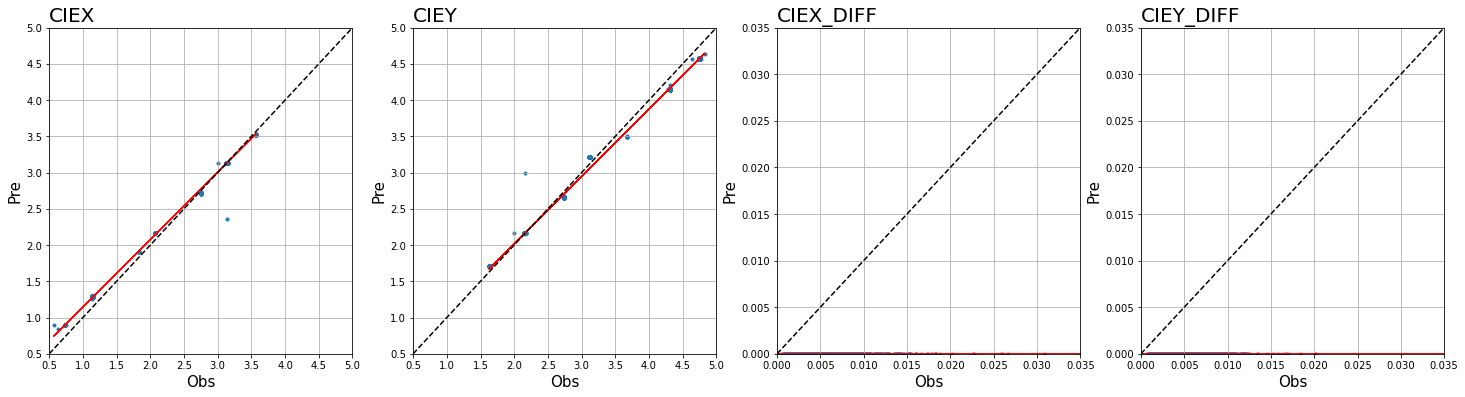

In [108]:
from sklearn.metrics import r2_score
plt.figure(figsize=(25,6))
for n in range(2):
    plt.subplot(1,4,n+1)
    plt.scatter(test_feature[TargetIndex[n]],Pre_df[n],marker = ".")
    plt.title(test_feature.columns[n],loc='left',fontsize=20)
    plt.xlabel("Obs",fontsize=15)
    plt.ylabel("Pre",fontsize=15)
    plt.ylim(0.5,5)
    plt.xlim(0.5,5)
    z = np.polyfit(pd.to_numeric(test_feature[TargetIndex[n]]), pd.to_numeric(Pre_df[n]), 1)
    p = np.poly1d(z) 
    plt.plot(test_feature[TargetIndex[n]],p(test_feature[TargetIndex[n]]),"r")
    plt.grid()
    plt.plot([0.5, 5], [0.5, 5],ls='--',c="0")
for n in range(2,4,1):
    plt.subplot(1,4,n+1)
    plt.scatter(test_feature[TargetIndex[n]],Pre_df[n],marker = ".")
    plt.title(test_feature.columns[n],loc='left',fontsize=20)
    plt.xlabel("Obs",fontsize=15)
    plt.ylabel("Pre",fontsize=15)
    plt.ylim(0,0.035)
    plt.xlim(0,0.035)
    z = np.polyfit(pd.to_numeric(test_feature[TargetIndex[n]]), pd.to_numeric(Pre_df[n]), 1)
    p = np.poly1d(z) 
    plt.plot(test_feature[TargetIndex[n]],p(test_feature[TargetIndex[n]]),"r")
    plt.grid()
    plt.plot([0, 0.035], [0, 0.035],ls='--',c="0")
plt.savefig('MAE.jpg',bbox_inches='tight')

In [129]:
test_1_Pre =  model.predict(train_label.drop(['id'],axis=1))
Pre_df = pd.DataFrame(test_1_Pre)
W = [0.249,0.330,0.172,0.204]
Wmae = 0
for n in range(4):
    MAE = 0
    for i in range(len(Pre_df[0])):
        MAE = MAE + abs(Pre_df[n][i]-train_feature[TargetIndex[n]].iloc[i])
    Wmae = Wmae + (MAE/len(Pre_df[n]))*W[n]
print(Wmae)

0.07175321354606064


In [10]:
train_1_Pre =  model.predict(train_label.drop(['id'],axis=1).values)
train_2_label = train_label.drop(['id','5-1_value','5-2_value','5-3_value'],axis=1)
# train_2_label.insert(0,'CIEY',pd.DataFrame(train_1_Pre)[1])
# train_2_label.insert(0,'CIEX',pd.DataFrame(train_1_Pre)[0])

In [11]:
backend.clear_session()
seed(3)
#main neul network
model2 = Sequential()
#set layer
model2.add(Dense(100, kernel_initializer="uniform", input_dim=32,activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(units=18,activation='relu' ))
model2.add(Dense(units=18,activation='relu' ))
model2.add(Dense(units=18,activation='relu' ))
model2.add(Dropout(0.2))
model2.add(Dense(units=2,activation='relu'))
#model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
# my_sgd = optimizers.SGD(lr=0.032, decay=1e-6, momentum=0.7, nesterov=True)
model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=["mae"])
hist = model2.fit(train_2_label, train_2_feature, batch_size=96, epochs=10000, verbose=0,validation_split=0.2,callbacks=[callback])

In [12]:
test_1_Pre =  model.predict(test_label.drop(['id'],axis=1))
test_1_Pre = pd.DataFrame(test_1_Pre,index = range(3000,4963,1))
test_2_label = test_label.drop(['id','5-1_value','5-2_value','5-3_value'],axis=1)
# test_2_label.insert(0,'CIEY',test_1_Pre[1])
# test_2_label.insert(0,'CIEX',test_1_Pre[0])

Predict2 = model2.predict(test_2_label)
Predict2 = pd.DataFrame(Predict2,index = range(3000,4963,1))
Pre_df1 = pd.DataFrame(test_1_Pre)
Pre_df1.insert(2,'3',Predict2[1])
Pre_df1.insert(2,'2',Predict2[0])

ndarray = Pre_df1.values
Pre_df = pd.DataFrame(ndarray)

In [112]:
sub_1_Pre =  model.predict(sub_label.drop(['id'],axis=1))
sub_1_Pre = pd.DataFrame(sub_1_Pre)
sub_2_label = sub_label.drop(['id','5-1_value','5-2_value','5-3_value'],axis=1)
# sub_2_label.insert(0,'CIEY',sub_1_Pre[1])
# sub_2_label.insert(0,'CIEX',sub_1_Pre[0])

Predict2 = model2.predict(sub_2_label)
Predict2 = pd.DataFrame(Predict2)
Pre_df1 = pd.DataFrame(sub_1_Pre)
Pre_df1.insert(2,'3',Predict2[1])
Pre_df1.insert(2,'2',Predict2[0])

ndarray = Pre_df1.values
Pre_df = pd.DataFrame(ndarray)

In [116]:
writer = pd.ExcelWriter('subdnnreport.xlsx')
Pre_df.to_excel(writer,sheet_name="1")
writer.save()

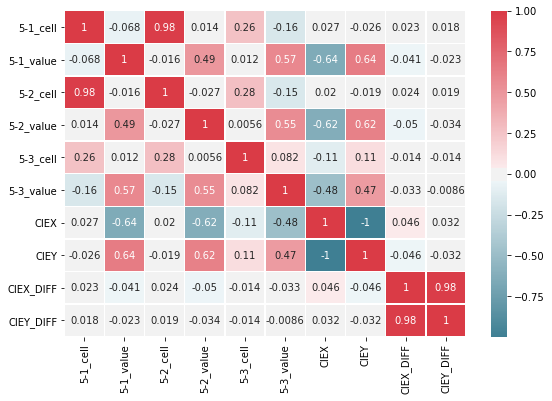

In [7]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = plt.subplots(figsize=(9, 6))
sns.heatmap(train_df[FeatureIndex+TargetIndex].corr(),annot=True,cmap = cmap , linewidths=.5)
plt.savefig("HtMap.jpg")